Checkpoint #1 RPA
Grupo Verde:



Fabio Lanfranchi, 87226

Genival Jr, 

Lucas Alves, 

### Projeto
Desenvolver uma apis que realize uma série de tarefas, descritas no arquivo do checkpoint.

In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import datetime
from datetime import datetime
from datetime import timedelta
from flask import send_from_directory
from flask import Flask
import seaborn as sns
#import aspose.words as aw
#from flask.globals import request
#import os
#import sys

# import directly from GitHub
df = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")

In [3]:
# Imprimindo primeiros registros
df.head(5)

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Imprimindo ultimos registros
df.tail(5)

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
21289,215,2022-04-11,Brazil,SC,TOTAL,2,21704,89,1686457,21704,...,2568392.0,35847.42493,6165669.0,86.05515,5424357.0,75.70855,277356.0,3.87110,2428386.0,33.89334
21290,215,2022-04-11,Brazil,SE,TOTAL,1,6335,31,326774,6335,...,604183.0,26283.72782,1955676.0,85.07763,1715237.0,74.61783,40326.0,1.75430,879634.0,38.26665
21291,215,2022-04-11,Brazil,SP,TOTAL,0,167706,1122,5310464,167706,...,19501783.0,42469.91918,41971953.0,91.40423,38675944.0,84.22636,1238630.0,2.69742,24917567.0,54.26412
21292,215,2022-04-11,Brazil,TO,TOTAL,0,4147,9,303624,4147,...,903975.0,57473.10960,1136704.0,72.26960,930550.0,59.16270,48357.0,3.07445,334234.0,21.25000
21293,215,2022-04-11,Brazil,TOTAL,TOTAL,63,661576,7930,30161909,661327,...,70923215.0,33247.70297,176537381.0,82.75799,156818053.0,73.51387,5193807.0,2.43478,82956976.0,38.88894


In [10]:
# Visualizando algumas informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21294 entries, 0 to 21293
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   epi_week                               21294 non-null  int64  
 1   date                                   21294 non-null  object 
 2   country                                21294 non-null  object 
 3   state                                  21294 non-null  object 
 4   city                                   21294 non-null  object 
 5   newDeaths                              21294 non-null  int64  
 6   deaths                                 21294 non-null  int64  
 7   newCases                               21294 non-null  int64  
 8   totalCases                             21294 non-null  int64  
 9   deathsMS                               21294 non-null  int64  
 10  totalCasesMS                           21294 non-null  int64  
 11  de

#### Média móvel (morte) dos 7 dias anteriores (nível Brasil);

Pegando a data atual e formatando para a saída do dataframe

In [5]:
#Pegando a data atual

naive = datetime.datetime.now()
dia = pytz.timezone('America/Sao_Paulo').localize(naive).strftime("%Y-%m-%d")

print (dia, type(dia))

2022-04-11 <class 'str'>


Transformando a data string em date type, aplicando um delta de 7 dias e retornando a data

In [6]:
str_date = dia

dia_atual = datetime.strptime(str_date, '%Y-%m-%d').date()


# Abaixo vamos usar 6 dias como delta p/ semana pois a função between utilizada mais a frente possui intervalo aberto
data_sete_dias = dia_atual - timedelta(days = 6)
print('Dia de hoje: ', dia_atual, type(dia_atual))
print('Dia há uma semana atras:', data_sete_dias, type(data_sete_dias))



Dia de hoje:  2022-04-11 <class 'datetime.date'>
Dia há uma semana atras: 2022-04-05 <class 'datetime.date'>


Com isso, temos as datas que serão utilizadas como parâmetros para a montagem da solução

In [7]:
# Dropando as colunas de estado, deixando a informação em nível de Brasil
df_deaths = df[df.state == "TOTAL"]

In [8]:
# Dropando colunas que não vamos usar
df_deaths.drop(['epi_week', 'newDeaths', 'newCases', 'totalCases', 'deathsMS', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 'vaccinated_per_100_inhabitants', 'vaccinated_second', 'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants', 'vaccinated_third', 'vaccinated_third_per_100_inhabitants', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', 'recovered', 'suspects'], axis=1, inplace=True)

C:\Users\f_lan\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
# Criando uma coluna Datetime que será utilizada como parâmetro para as funções lógicas envolvendo data
# Isso é necessário pois o campo 'date' é string
df_deaths['Datetime'] = pd.to_datetime(df_deaths['date']).dt.date

<ipython-input-12-e98c4867706e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deaths['Datetime'] = pd.to_datetime(df_deaths['date']).dt.date


In [14]:
# Pegando o range de time que nos interessa
filtered_df =df_deaths.loc[df_deaths["Datetime"].between(data_sete_dias, dia_atual)]

In [15]:
# Printando o df final
filtered_df.head(10)

,date,country,state,city,deaths,Datetime
21125,2022-04-05,Brazil,TOTAL,TOTAL,660786,2022-04-05
21153,2022-04-06,Brazil,TOTAL,TOTAL,660980,2022-04-06
21181,2022-04-07,Brazil,TOTAL,TOTAL,661228,2022-04-07
21209,2022-04-08,Brazil,TOTAL,TOTAL,661228,2022-04-08
21237,2022-04-09,Brazil,TOTAL,TOTAL,661475,2022-04-09
21265,2022-04-10,Brazil,TOTAL,TOTAL,661513,2022-04-10
21293,2022-04-11,Brazil,TOTAL,TOTAL,661576,2022-04-11


In [16]:
# Obtendo os valores minimo e máximo do intervalo
max= filtered_df.deaths.max()
min= filtered_df.deaths.min()

In [17]:
# Calculando a diferença, resultando no total de mortes
dif = max - min
print ("Total de mortes nos últimos 7 dias:", dif)

Total de mortes nos últimos 7 dias: 790


In [18]:
# Printando a média móvel
media_movel = dif/7
print(f"A média móvel é de {media_movel} mortes por dia no Brasil.")

A média móvel é de 112.85714285714286 mortes por dia no Brasil.


In [19]:
# Transformando a média p/ string
media_movel = str(media_movel)
type(media_movel)

str

Criando a API

Com a tratativa acima feita, passaremos apenas o valor descoberto para a nossa api.

In [20]:
app = Flask(__name__)

@app.route("/brasil", methods=["GET"])
def get_media_brasil():
    return media_movel
    

if __name__ == "__main__":
    app.run(host='0.0.0.0', port=5051)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5051/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Apr/2022 21:27:40] "GET /brasil HTTP/1.1" 200 -


Resultado Esperado

![title](../src/v1.png)

#### Média móvel (morte) dos 7 dias anteriores, selecionando o estado;

Processo semelhante ao anterior, porém passamos o argumento estado pela url, para que exista a dinamicidade.

In [24]:
app = Flask(__name__)


@app.route("/<estado>/", methods=["GET"]) # Estado sendo passado como argumento
def get_media_estado(estado):
    df_estado = df[df.state == f"{estado}"]
    df_estado.drop(['epi_week', 'newDeaths', 'newCases', 'totalCases', 'deathsMS', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 'vaccinated_per_100_inhabitants', 'vaccinated_second', 'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants', 'vaccinated_third', 'vaccinated_third_per_100_inhabitants', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', 'recovered', 'suspects'], axis=1, inplace=True)

    df_estado['Datetime'] = pd.to_datetime(df_estado['date']).dt.date
    filtered_df =df_estado.loc[df_estado["Datetime"].between(data_sete_dias, dia_atual)]

    max= filtered_df.deaths.max()
    min= filtered_df.deaths.min()

    dif = max - min
    print ("Total de mortes nos últimos 7 dias:", dif)

    media_movel = dif/7
    media_movel = str(media_movel)
    
    return media_movel


if __name__ == "__main__":
    app.run(host='0.0.0.0', port=5051)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5051/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Apr/2022 19:12:17] "GET /RJ HTTP/1.1" 308 -
<ipython-input-24-a43428d7c8c7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estado['Datetime'] = pd.to_datetime(df_estado['date']).dt.date
127.0.0.1 - - [11/Apr/2022 19:12:17] "GET /RJ/ HTTP/1.1" 200 -


Total de mortes nos últimos 7 dias: 91


![title](../src/v3.png)

#### Gráfico de barras com o número de casos do dia por estados;


Para este exercícios, aplicamos um delta de 2 dias pois tanto na data atual quanto no dia anterior o Dataset ainda não havia sido atualizado com as informações de casos novos.

In [22]:
# Ajustando o df

df2 = df.loc[:,'date':'newCases']                               # selecinando colunas
df2['Datetime'] = pd.to_datetime(df2['date']).dt.date           # setando coluna de data
dia_anterior = dia_atual - timedelta(days = 2)                  # pegando info do dia anterior
filtered_df = df2.loc[df2['Datetime'] == dia_anterior]          # filtrando estados pela data
filtered_df.drop(columns=['date', 'country', 'city'], axis=1, inplace=True)     # Dropando colunas
filtered_df.head(50)                                            # visualizando df


C:\Users\f_lan\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,state,newDeaths,deaths,newCases,Datetime
21210,AC,1,1995,5,2022-04-09
21211,AL,5,6903,97,2022-04-09
21212,AM,0,14160,75,2022-04-09
21213,AP,0,2128,0,2022-04-09
21214,BA,20,29768,724,2022-04-09
21215,CE,11,26817,550,2022-04-09
21216,DF,4,11610,187,2022-04-09
21217,ES,12,14357,982,2022-04-09
21218,GO,21,26348,9492,2022-04-09
21219,MA,1,10877,492,2022-04-09


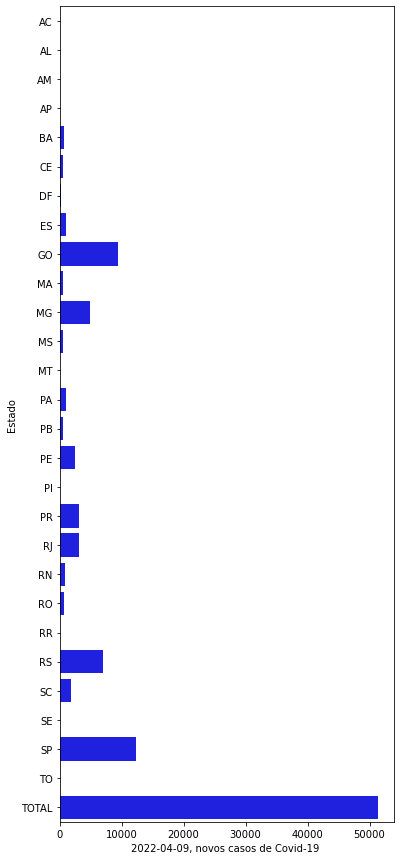

In [25]:
# Gerando o grafico
# variaveis
y='state'
label='Datetime'
x='newCases'
data=filtered_df

# criando imagem
f, ax = plt.subplots(figsize=(6,15))

# criando plot
plot = sns.barplot(x=x, y=y, data=data,label=label,color='b')
ax.set(xlabel= f"{dia_anterior}, novos casos de Covid-19 ")
ax.set(ylabel= "Estado")
plt.show()


Com o gráfico que queremos, vamos montar o nosso endpoint:

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5051/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Apr/2022 21:37:37] "GET /casos HTTP/1.1" 308 -
127.0.0.1 - - [11/Apr/2022 21:37:37] "GET /casos/ HTTP/1.1" 200 -


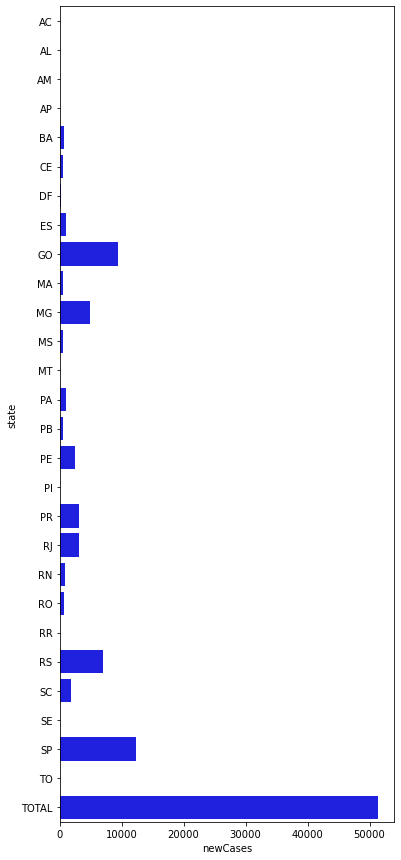

In [27]:
app = Flask(__name__, template_folder= 'static')


@app.route("/casos/", methods=["GET"])
def get_grafico_newcases():
    # preparando o df
    df2 = df.loc[:,'date':'newCases']
    df2['Datetime'] = pd.to_datetime(df2['date']).dt.date
    dia_anterior = dia_atual - timedelta(days = 2)
    filtered_df = df2.loc[df2['Datetime'] == dia_anterior]
    filtered_df.drop(columns=['date', 'country', 'city'], axis=1, inplace=True)

    # preparando o grafico
    y='state'
    label='Datetime'
    x='newCases'
    data=filtered_df
    f, ax = plt.subplots(figsize=(6,15))
    sns.barplot(x=x, y=y, data=data,label=label,color='b')
    
    # salvando o grafico
    plot = plt.gcf()  
    plot.savefig('grafico_newcases.png', format='png')
    
    # retornando o grafico
    image_name = 'grafico_newcases.png'
    return send_from_directory(app.root_path, filename=image_name, as_attachment=True)



if __name__ == "__main__":
    app.run(host='0.0.0.0', port=5051)

Resultado esperado:


![title](../src/v4.png)

#### Gráfico de linha com uma série temporal de casos, por estado, em que será recebido data de inicio data de fim

In [28]:
# Preparando df
df3 = df
df3.drop(['epi_week', 'newDeaths', 'deathsMS', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 'vaccinated_per_100_inhabitants', 'vaccinated_second', 'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants', 'vaccinated_third', 'vaccinated_third_per_100_inhabitants', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', 'recovered', 'suspects'], axis=1, inplace=True)
df3['Datetime'] = pd.to_datetime(df3['date'], errors= 'coerce')

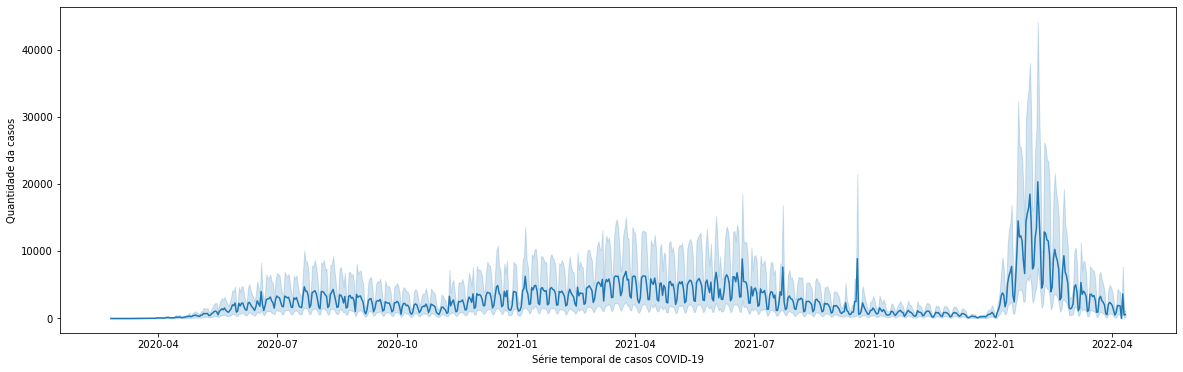

In [30]:
# Preparando o grafico geral
x= df3['Datetime']
y= df3['newCases']
data = df3

f, ax = plt.subplots(figsize=(20,6))

plot = sns.lineplot(
    x=x,
    y=y,
    data=data,
    legend ='full'

)
ax.set(ylabel= f"Quantidade da casos")
ax.set(xlabel= f"Série temporal de casos COVID-19")
plt.show()


Diferentemente do gráfico acima, o nosso desejo é retornar um gráfico dentro de um tempo determinado.

Sendo assim, iremos coletar essas infos atraves de um input do usuário, e pegaremos a info do estado de maneira semelhante ao que fizemos no exercício de média móvel por estado.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5051/ (Press CTRL+C to quit)
127.0.0.1 - - [11/Apr/2022 21:45:31] "GET /grafico/SP HTTP/1.1" 308 -
127.0.0.1 - - [11/Apr/2022 21:45:31] "GET /grafico/SP/ HTTP/1.1" 200 -


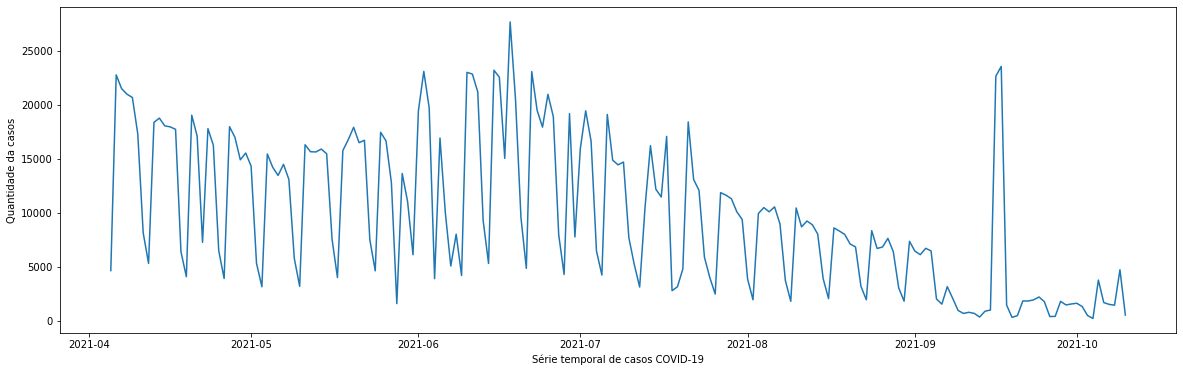

In [31]:
# Pegando as informações do período de interesse
dia_inicio = input("Digite a data ínicio no formato YYYY-MM-DD")
dia_fim = input("Digite a data fim no formato YYYY-MM-DD")

app = Flask(__name__)


@app.route("/grafico/<estado>/", methods=["GET"])
def plota_grafico_serie_temporal(estado):
    # preparando df, incluindo variavel Datetime do dtype datetime
    df3 = df
    df3['Datetime'] = pd.to_datetime(df3['date'], errors= 'coerce')
    df3 = df3[df3.state == f"{estado}"]
    filtered_df =df3.loc[df3["Datetime"].between(dia_inicio, dia_fim)]

    # Variaveis
    x= filtered_df['Datetime']
    y= filtered_df['newCases']
    data = filtered_df

    # Criando o plot
    f, ax = plt.subplots(figsize=(20,6))

    plot = sns.lineplot(
        x=x,
        y=y,
        data=data,
        legend ='full'

    )
    ax.set(ylabel= f"Quantidade da casos")
    ax.set(xlabel= f"Série temporal de casos COVID-19")
    
    # Salvando o gráfico
    plot = plt.gcf()
    plot.savefig('grafico_serietemporal.png', format='png')

    # Retornando o gráfico
    image_name = "grafico_serietemporal.png"
    return send_from_directory(app.root_path, filename=image_name, as_attachment=True)


if __name__ == "__main__":
    app.run(host='0.0.0.0', port=5051)

Resultado esperado: 

![title](../src/v5.png)

## **Perguntas & Respostas**

*1 - Antes, para conseguir essas informações, o usuário deveria ligar para o telefone do ministério da saúde solicitando estas informações. Entre um atendente e outro, para conseguir essas 4 informações (uma pessoa de São Paulo), o usuário levava cerca de 2min. Em quanto tempo esse usuário conseguiria essas informações utilizando a plataforma de vocês (soma do valor da latência média dos endpoints)?*<br>
**Resposta:** Considerando que a informação já baixada da fonte (por se tratar de um dataset maior e que pode impactar na velocidade do carregamento dele), o usuário veria uma melhora significativa na busca das mesmas informações, levando até no máximo 1 minuto - isto é, uma redução de 50%.

<br>

*2 - Por que você escolheu essa fonte de dados e não outra? Que critérios vocês utilizaram para esta escolha?*<br>
**Resposta:** Devido à facilidade de obtenção dela, hospedada no GitHub e atualizada frequentemente com os dados reportados pelas autoridades civis da área da saúde.

<br>

*3 - Um usuário cego deseja obter as informações. Seria possível a construção de alguma opção de acessibilidade para esse tipo de usuário?*<br>
**Resposta:** Seria possível indicar o uso dessa API no navegador Microsoft Edge, que possui capacidade de leitura de informações de tela de forma nativa.

<br>

*4 - Um usuário que deseja assinar a "newsletter" do site, conseguiria receber estas informações diariamente em seu email?*<br>
**Resposta:** Isso é relativamente fácil de implementar, apenas colocando o retorno dessas informações em variáveis dentro de um script em HTML com as informações da newsletter e ter um cronjob para enviá-la nessa periodicidade.

<br>

*5 - Considerando que era investido cerca de 0,10 centavos (dinheiro público) para cada ligação, que eram recebidas cerca de 100.000 ligações por dia e que a pandemia começou 01/03/2020 e terminou a exatamente 2 anos depois (situação hipotética), quanto você cobraria pra implantar sua solução, considerando que vocês como empresa querem maximizar os lucros e ao mesmo tempo, tornar a proposta atrativa para o governo? Por que esse valor foi escolhido?*<br>
**Resposta:** 

## **Referências**

1.   W. Cota, **“Monitoring the number of COVID-19 cases and deaths in brazil at municipal and federative units level”**, SciELOPreprints:362 (2020), [10.1590/scielopreprints.362](https://doi.org/10.1590/SciELOPreprints.362)
2.   G. S. Costa, W. Cota, S. C. Ferreira, **"Outbreak diversity in epidemic waves propagating through distinct geographical scales"**, Phys. Rev. Research 2, 043306, [10.1103/PhysRevResearch.2.043306](https://doi.org/10.1103/PhysRevResearch.2.043306)
3.   R. Li, S. Pei, B. Chen, Y. Song, T. Zhang, W. Yang, J. Shaman, **"Substantial undocumented infection facilitates the rapid dissemination of novel coronavirus (SARS-CoV-2)"**, [Science 368, 489 (2020)](https://www.science.org/doi/10.1126/science.abb3221).
